In [322]:
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [154]:
from scipy.cluster.vq import whiten, kmeans2

***Глобальные данные для подключения к API***

In [155]:
AUTH_URL = 'http://api.football-data.org/v1'
TOKEN = '4db1a836461449fe921e77cbcfb458a2'
HEADERS = {
        'X-Auth-Token': TOKEN,
}

***Функция для обращения к API***

In [156]:
def call_football_data_api(url, *args):
    return requests.get('/'.join((url, *args)), headers = HEADERS).json()
    

***Функция для получения необходимых данных для анализа***

In [396]:
def get_league_table(league_code='401'):
    league_table = call_football_data_api(AUTH_URL, 'soccerseasons', league_code, 'leagueTable')
    team_data_for_analysis = []
    for position in league_table['standing']:
        team = call_football_data_api(position['_links']['team']['href'])

        time.sleep(0.5)

        players = call_football_data_api(team['_links']['players']['href'])

        time.sleep(0.5)

        number_of_forwards = sum(1 for player in players['players'] if player['position'] == 'Centre-Forward')
        team_data_for_analysis.append(
                                    {'Team_name': position['teamName'],
                                     'Number_of_goals': position['goals'],
                                     'Number_of_forwards': number_of_forwards})
    return team_data_for_analysis

***Получаем данные***

In [403]:
team_data_for_analysis = get_league_table()

    Number_of_forwards  Number_of_goals                 Team_name
0                    3               75            Juventus Turin
1                    2               80                SSC Napoli
2                    2               83                   AS Roma
3                    3               50  FC Internazionale Milano
4                    2               60            ACF Fiorentina
5                    3               49        US Sassuolo Calcio
6                    3               49                  AC Milan
7                    4               52                  SS Lazio
8                    2               43          AC Chievo Verona
9                    2               45                 Genoa CFC
10                   2               40                 Empoli FC
11                   3               52                 Torino FC
12                   3               41               Atalanta BC
13                   3               33                Bologna FC
14        

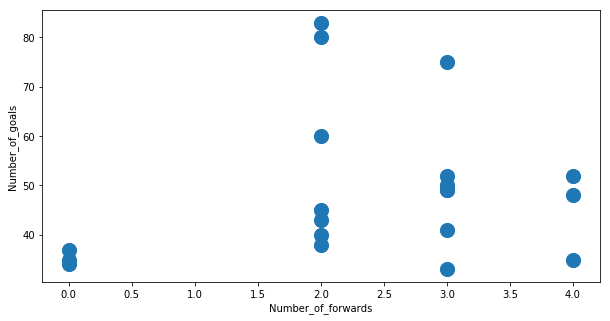

In [424]:
team_data = pd.DataFrame(team_data_for_analysis)
pprint(team_data)
team_data.plot(kind='scatter', x='Number_of_forwards', y='Number_of_goals', s=200, figsize=(10,5))


***Функция для кластеризации данных***

In [430]:
def get_clusters_by_kmeans(data_to_analysis, number):
    team_data = pd.DataFrame(data_to_analysis)
    del team_data['Team_name']
    whitened_data = whiten(team_data.as_matrix())
    centroids, cluster_map = kmeans2(whitened, number)
    colors_map = {0: 'green', 1: 'blue', 2: 'magenta', 3: 'yellow', 4: 'red'}
    colors = [colors_map[color] for color in cluster_map]
    team_data.plot(kind='scatter', x='Number_of_forwards', y='Number_of_goals', c=colors, s=200, figsize=(10,7))

***Итоговые результаты***

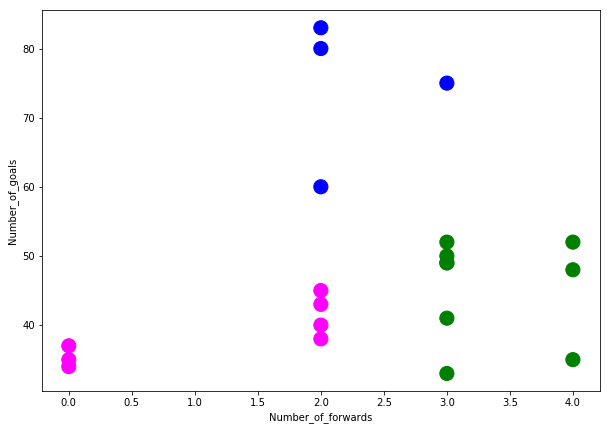

In [431]:
get_clusters_by_kmeans(team_data_for_analysis, 3)

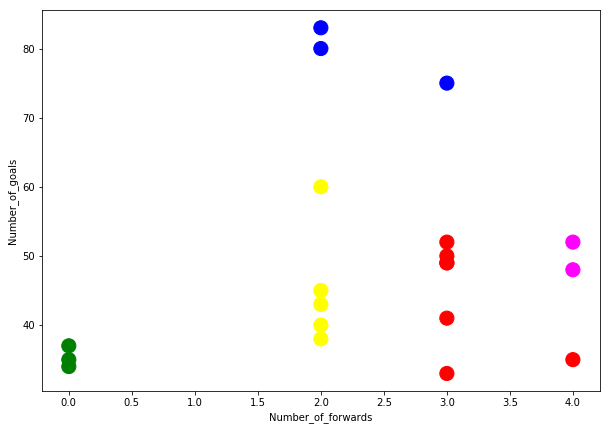

In [437]:
get_clusters_by_kmeans(team_data_for_analysis, 5)